In [1]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
#any missing values?
df.isnull().values.any()

False

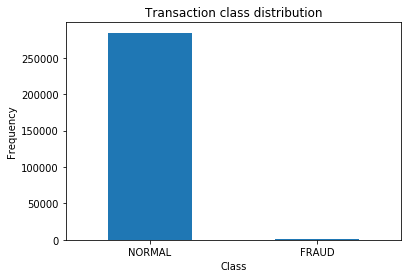

In [44]:
#is the data imbalanced?
%matplotlib inline
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ["NORMAL","FRAUD"])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [45]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [83]:
#let us drop Time and scale the data

from sklearn.preprocessing import StandardScaler
df = df.drop('Time', axis = 1)
y = df['Class']
df = df.drop('Class', axis = 1)
scaler = StandardScaler()
df = scaler.fit_transform(df)

df[:5,:]

array([[-0.69424232, -0.04407492,  1.6727735 ,  0.97336551, -0.24511658,
         0.34706795,  0.19367894,  0.08263728,  0.33112778,  0.08338555,
        -0.54040704, -0.61829572, -0.99609892, -0.32461019,  1.60401384,
        -0.53683287,  0.24486345,  0.03076993,  0.49628203,  0.32611802,
        -0.02492336,  0.38285444, -0.17691133,  0.11050692,  0.24658544,
        -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 ,  0.31652293,  0.04348335,
        -0.06181997, -0.06370021,  0.07125348, -0.23249419, -0.15334963,
         1.58000285,  1.06608857,  0.4914182 , -0.14998248,  0.69436042,
         0.52943375, -0.13516997, -0.21876258, -0.17908605, -0.08961086,
        -0.3073768 , -0.88007675,  0.16220118, -0.56113055,  0.3206939 ,
         0.26106948, -0.02225568,  0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849,  0.26823129, -0.36457179,
         1.35145359,  0.63977564,  0.20737273, -1.37867535,  0.19069961,
  

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
x_train, x_test, y_train, y_test = train_test_split(df, y, shuffle = True,
                                                   train_size = 0.8,
                                                   random_state = 100)

In [50]:
y_train.value_counts()

0    227449
1       396
Name: Class, dtype: int64

In [51]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = clf.predict(x_test)

In [53]:
y_test.value_counts()

0    56866
1       96
Name: Class, dtype: int64

In [54]:
matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

In [55]:
#function to display confusion matrix
LABELS = ["Normal","Fraud"]
import seaborn as sns
def draw_matrix(conf_matrix, LABELS):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS,
                yticklabels=LABELS, annot=True, fmt="f");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

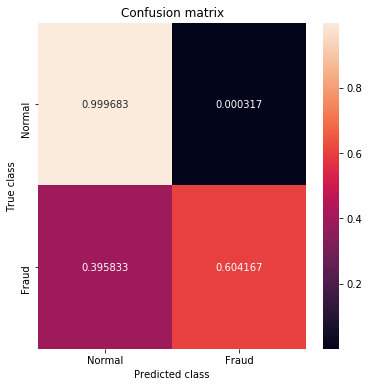

In [56]:
draw_matrix(matrix, LABELS)

In [50]:
import sklearn
sklearn.__version__

'0.22.1'

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.76      0.60      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



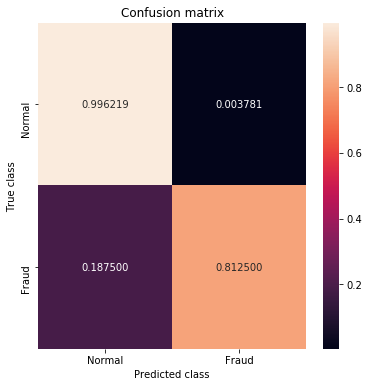

In [59]:
#let us try adjusting class weights
clf = LogisticRegression(class_weight = {0:1, 1:100})
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

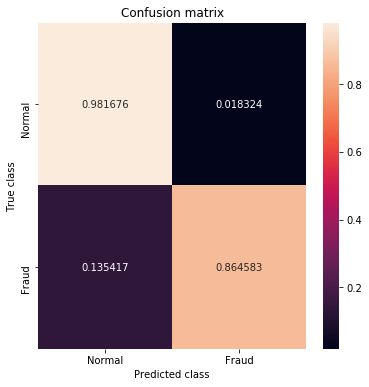

In [60]:
#let us try adjusting class weights a little more
clf = LogisticRegression(class_weight = {0:1, 1:500})
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [61]:
#let us try undersampling the negative class (i.e., no fraud)
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler() 
X_resampled, y_resampled = rus.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
X_resampled.shape, y_resampled.shape

((792, 29), (792,))

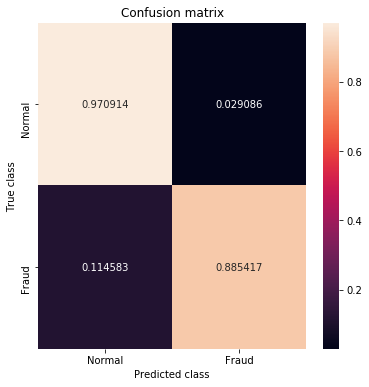

In [63]:
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [64]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN() 
X_resampled, y_resampled = ada.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
X_resampled.shape, y_resampled.shape

((454915, 29), (454915,))

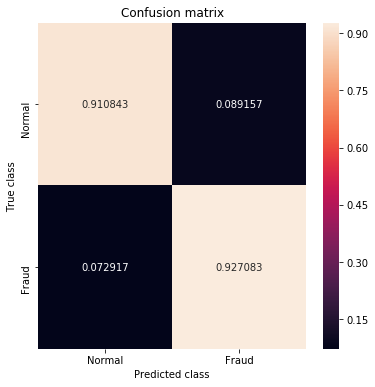

In [66]:
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [68]:
#Let us use a combination of Smote and Edited Nearest Neighbor
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
X_resampled, y_resampled = smo.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
X_resampled.shape, y_resampled.shape

((430495, 30), (430495,))

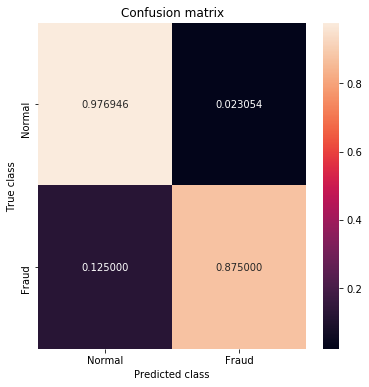

In [69]:
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [84]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [85]:
df['Class'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [86]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [93]:
from sklearn.svm import OneClassSVM 
train, test = train_test_split(df, shuffle = True, test_size=.2) 
train_normal = train[train['Class']==0] 
train_outliers = train[train['Class']==1] 
outlier_prop = len(train_outliers) / len(train_normal)
train_normal = train_normal.drop('Class', axis =1)
y_test = test['Class']
test = test.drop('Class', axis = 1)
svm = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.1)
svm.fit(train_normal)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.001741049641897744, shrinking=True, tol=0.001,
            verbose=False)

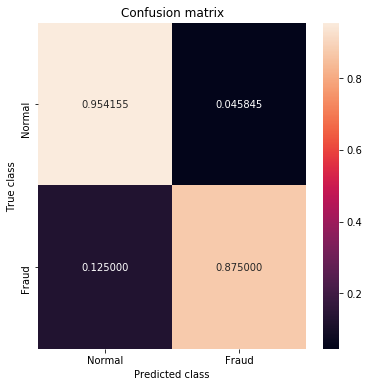

In [94]:
y_pred = svm.predict(test.values)
#y_pred = (y_pred + 1) // 2
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)